# **Ridge Regularization**

**Intution on Polynomial data**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [57]:
X = data.data
y = data.target

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression

L = LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [60]:
print(L.coef_)
print(L.intercept_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
151.34560453985995


In [61]:
y_pred = L.predict(X_test)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.4526027629719195
MSE: 53.85344583676593


In [63]:
from sklearn.linear_model import Ridge

R = Ridge(alpha=100000)
R.fit(X_train, y_train)
y_pred1 = R.predict(X_test)
print("Slope:", R.coef_)
print("Intercept:", R.intercept_)
print("R2 Score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Slope: [ 2.50178788e-03  9.31024633e-05  7.85566990e-03  5.92336997e-03
  2.62001500e-03  2.02748670e-03 -4.96365711e-03  5.58198631e-03
  7.25668147e-03  5.18926072e-03]
Intercept: 153.7364971055568
R2 Score: -0.011937773360617188
RMSE: 53.85344583676593


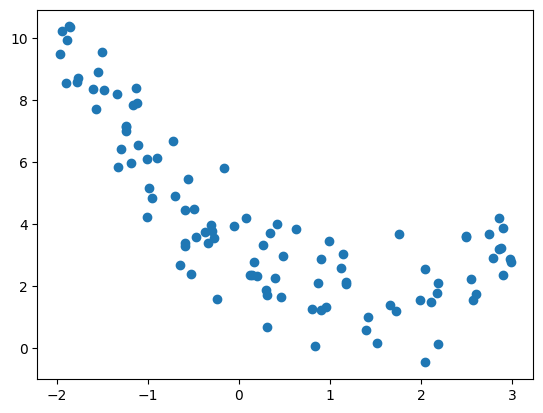

In [64]:
# Dummy polynomial data

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [65]:
# Plotting graph with different alpha values

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

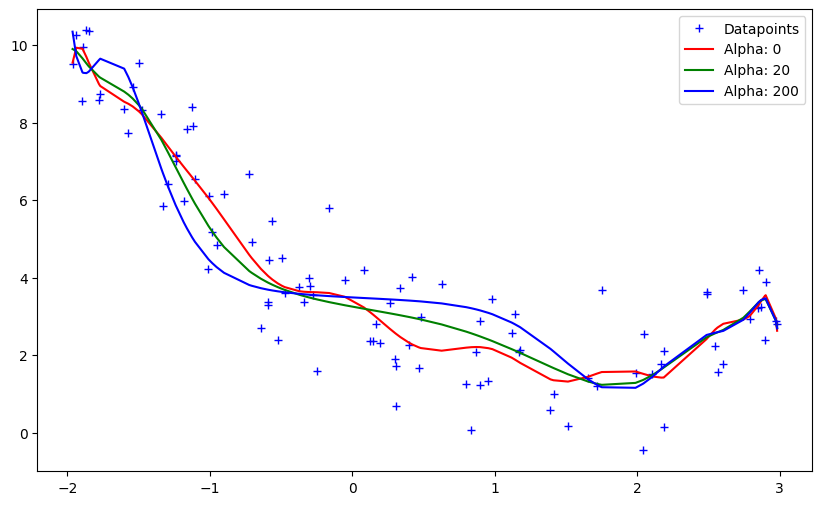

In [66]:
def get_preds_ridge(x1, x2, alpha):
  model = Pipeline([
      ('poly_features', PolynomialFeatures(degree=16)),
      ('ridge', Ridge(alpha=alpha))
  ])
  model.fit(x1, x2)
  return model.predict(x1)

alphas = [0, 20, 200]
cs = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
  preds = get_preds_ridge(x1, x2, alpha)

  #plot
  plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])],c ,label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

## **Ridge Regression Key Understandings**


### **1. How are coefficients get affected?**

In [67]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [68]:
data = load_diabetes()

In [69]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target

In [70]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [71]:
df.shape

(442, 11)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [73]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,test_size=0.2 ,random_state=42)

In [75]:
X_train.shape

(353, 10)

In [76]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

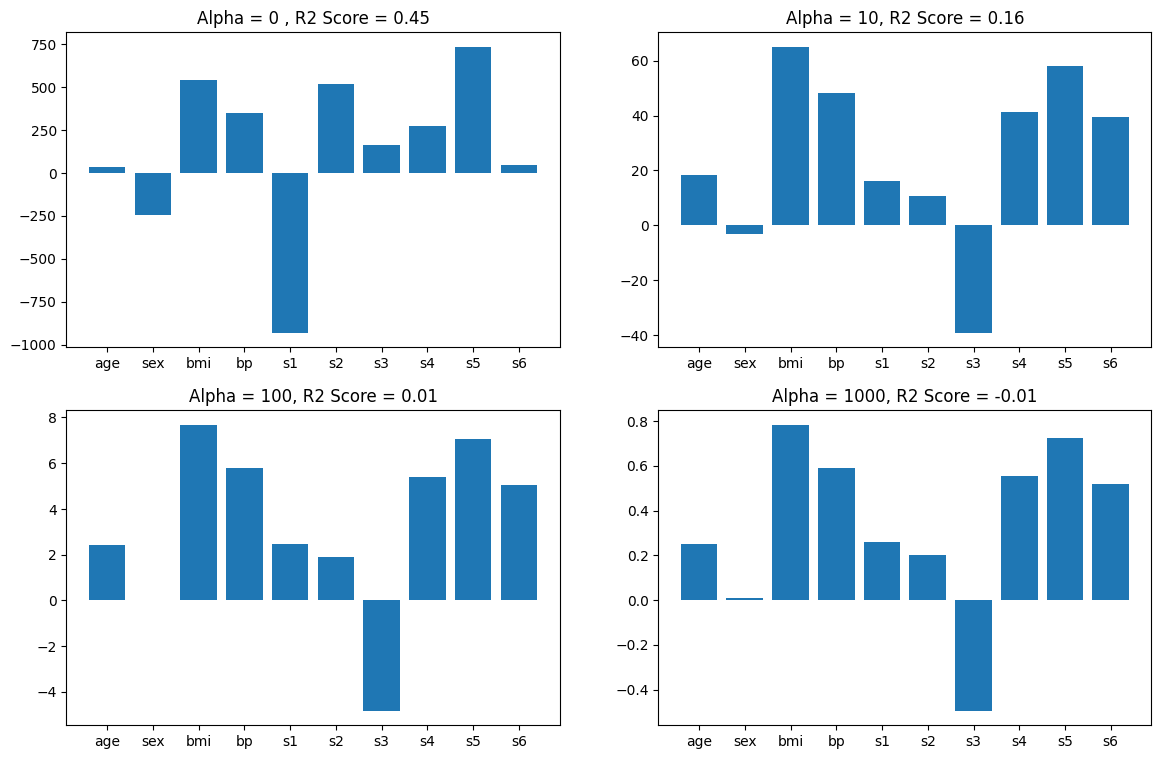

In [80]:
coefs = []
r2_scores = []

for i in [0, 10, 100, 1000]:
  reg = Ridge(alpha=i)
  reg.fit(X_train, y_train)

  coefs.append(reg.coef_.tolist())
  y_pred2 = reg.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred2))


# Plot

plt.figure(figsize=(14, 9))
plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha = 0 , R2 Score = {}'.format(round(r2_scores[0], 2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('Alpha = 10, R2 Score = {}'.format(round(r2_scores[1], 2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha = 100, R2 Score = {}'.format(round(r2_scores[2], 2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('Alpha = 1000, R2 Score = {}'.format(round(r2_scores[3], 2)))

plt.show()

In [84]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


### **Higher coefficients are affected more**

In [86]:
alphas = [0, 0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000]

coefs = []

for i in alphas:
  rig = Ridge(i)
  rig.fit(X_train, y_train)

  coefs.append(rig.coef_.tolist())

In [87]:
input_array = np.array(coefs)

In [92]:
coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
0.0001,37.968967,-241.900460,542.593504,347.604088,-919.863924,508.995920,158.213776,273.689919,731.714305,48.786920
0.0010,38.483505,-241.351795,543.835179,346.782831,-827.701995,437.173749,116.949753,260.759264,696.129223,49.743447
0.0100,40.693422,-237.008020,546.161792,341.809317,-430.146300,129.902301,-60.460817,203.990842,541.098025,55.482553
1.0000,45.367377,-76.666086,291.338832,198.995817,-0.530310,-28.577050,-144.511905,119.260066,230.221608,112.149830
10.0000,18.229623,-3.277536,65.128417,48.219668,16.238315,10.861055,-39.208913,41.438568,57.950124,39.359401
100.0000,2.414573,0.036315,7.689592,5.786517,2.488549,1.902019,-4.832511,5.397252,7.072654,5.030673
1000.0000,0.249289,0.008728,0.783880,0.590946,0.260657,0.201464,-0.495031,0.556314,0.723795,0.517311
10000.0000,0.025010,0.000926,0.078541,0.059221,0.026188,0.020263,-0.049624,0.055803,0.072550,0.051878


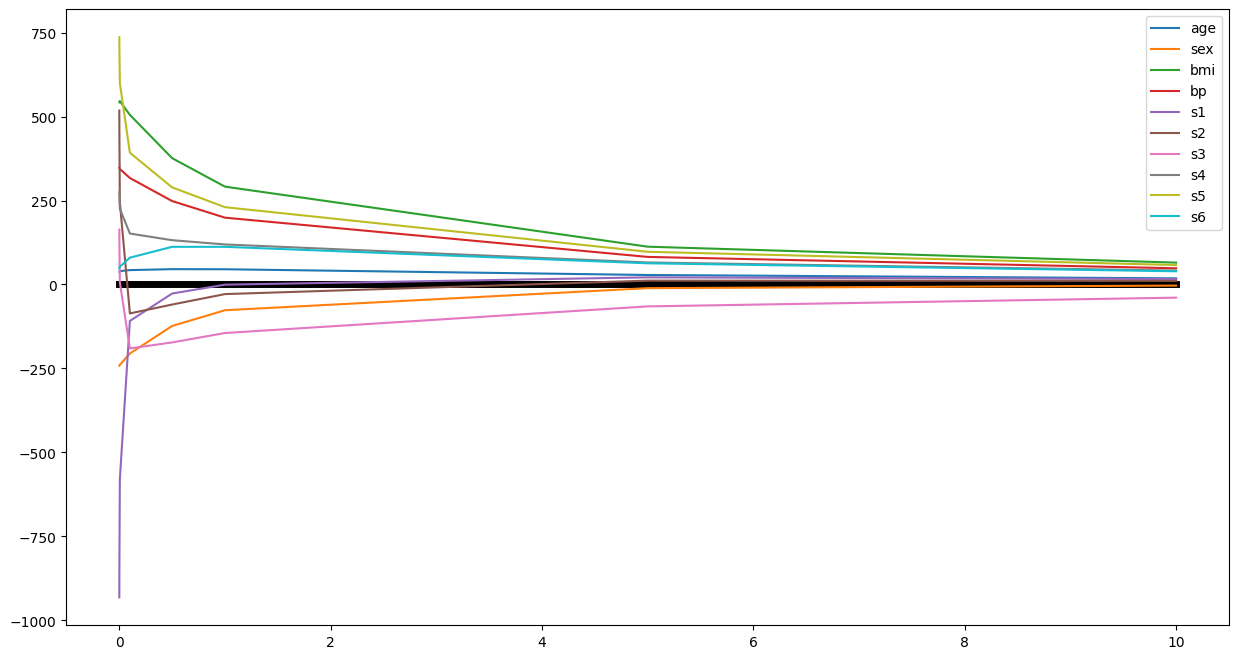

In [95]:
# Graphically showing higher coefficient penalizes more

alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

3. Effect on Bias and Variance

4. Effect of Regularization on Loss Function bold text

# **Lasso**

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[27.69266079]
-2.6785961247588683


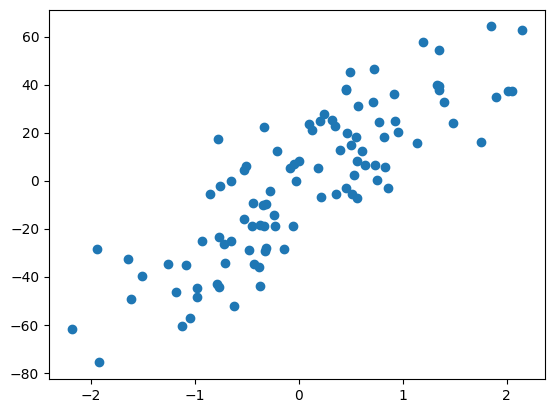

In [101]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+04, tolerance: 7.924e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

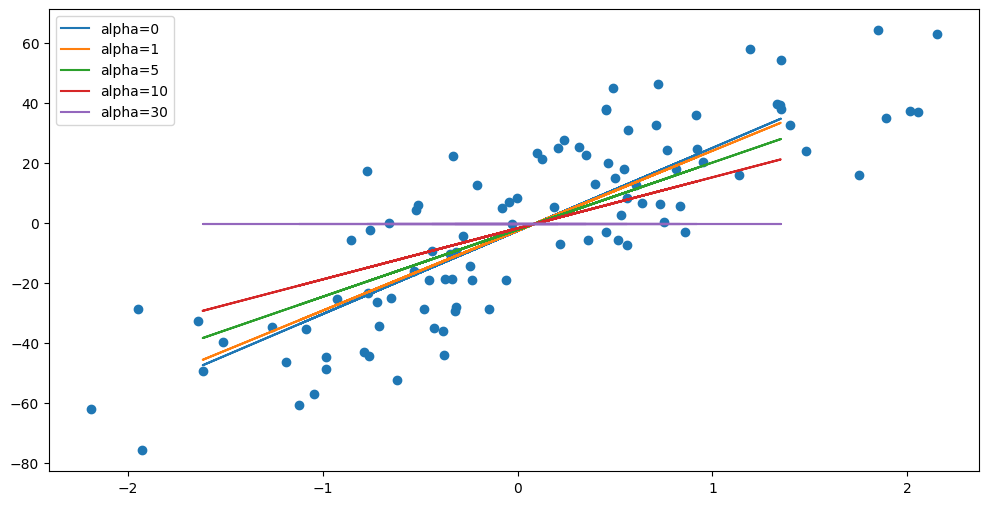

In [102]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

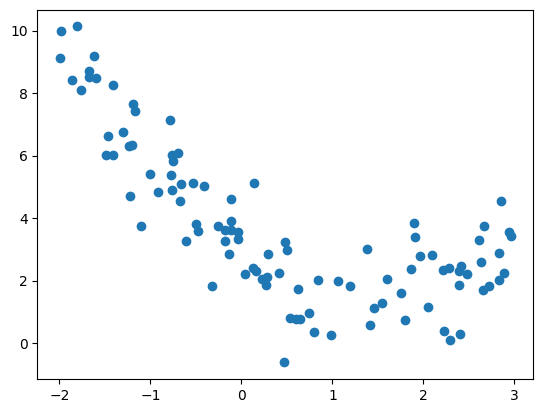

In [103]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.832e+01, tolerance: 6.149e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

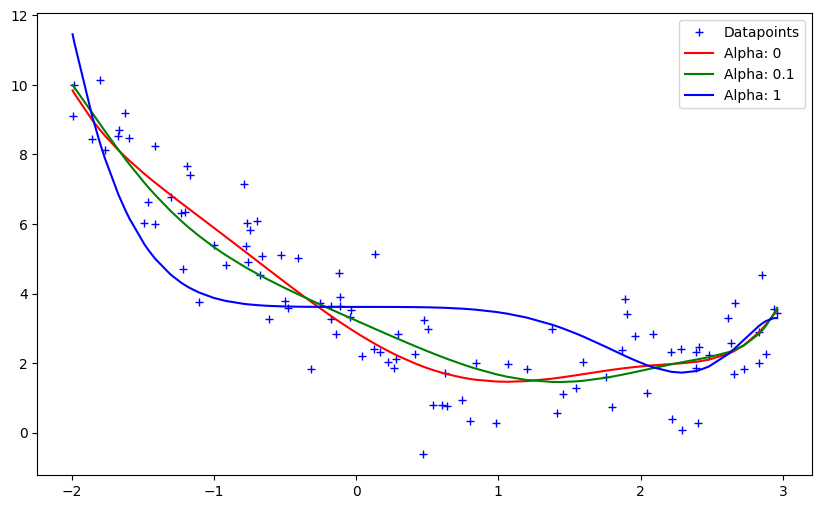

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

1.   Use Lasso where we know that is our dataset not every column is important meanwhile only subset of columns are important then go for lasso.
2.   Use Ridge where every column is important



# **ElasticNet Regression**

In [107]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [109]:
X, y = load_diabetes(return_X_y=True)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [111]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("R2_Score: ", r2_score(y_test, y_pred))

R2_Score:  0.4399338661568968


In [112]:
# Ridge

rig = Ridge(alpha=0.1)
rig.fit(X_train, y_train)
y_pred1 = rig.predict(X_test)
print("R2 Score :", r2_score(y_test, y_pred1))

R2 Score : 0.45199494197195456


In [113]:
# Lasso

las = Lasso(alpha=0.01)
las.fit(X_train, y_train)
y_pred2 = las.predict(X_test)
print("R2 Score :", r2_score(y_test, y_pred2))

R2 Score : 0.44111855963110613


In [118]:
# ElasticNet

elastic = ElasticNet(alpha=0.005, l1_ratio=0.9)
elastic.fit(X_train, y_train)
y_pred3 = elastic.predict(X_test)
print("R2 Score :", r2_score(y_test, y_pred3))

R2 Score : 0.4531474541554823
